In [1]:
import numpy as np
import pandas as pd
labels = ['a','b','c']
my_data = [10,20,30]
arr = np.array(my_data)
d = {'a':10,'b':20,'c':30}

In [2]:
pd.Series(data=my_data)

0    10
1    20
2    30
dtype: int64

In [3]:
pd.Series(data=my_data,index=labels)

a    10
b    20
c    30
dtype: int64

In [9]:
pd.Series(arr,index=labels)

a    10
b    20
c    30
dtype: int32

In [10]:
pd.Series(data=d)

a    10
b    20
c    30
dtype: int64

In [13]:
ser1 = pd.Series([1,2,3,4],['gg','ggh','gthf','hyuj'])
ser1

gg      1
ggh     2
gthf    3
hyuj    4
dtype: int64

In [14]:
ser2 = pd.Series([1,2,5,4],['gg','dswr','hhl','hyuj'])
ser2

gg      1
dswr    2
hhl     5
hyuj    4
dtype: int64

In [15]:
ser1 + ser2

dswr    NaN
gg      2.0
ggh     NaN
gthf    NaN
hhl     NaN
hyuj    8.0
dtype: float64

In [48]:
df = pd.DataFrame({'Weight':[-1, 88, 56, 15, 71],
                   'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
                   'Age':[14, 25, -3, 0.1, 21]})

In [49]:
df

,Weight,Name,Age
0,-1,Sam,14.0
1,88,Andrea,25.0
2,56,Alex,-3.0
3,15,Robin,0.1
4,71,Kia,21.0


In [50]:
df.loc[0]

Weight     -1
Name      Sam
Age        14
Name: 0, dtype: object

In [51]:
df.iloc[0]

Weight     -1
Name      Sam
Age        14
Name: 0, dtype: object

In [52]:
df.loc[0,'Weight']

-1

In [53]:
df.loc[[0,2],['Weight','Age']]

,Weight,Age
0,-1,14.0
2,56,-3.0


In [54]:
df 

,Weight,Name,Age
0,-1,Sam,14.0
1,88,Andrea,25.0
2,56,Alex,-3.0
3,15,Robin,0.1
4,71,Kia,21.0


In [56]:
df = df.drop('Name', axis=1)

In [58]:
boolc = df > 0

In [59]:
df[boolc]

,Weight,Age
0,NaN,14.0
1,88.0,25.0
2,56.0,NaN
3,15.0,0.1
4,71.0,21.0


In [60]:
df['Weight']>0

0    False
1     True
2     True
3     True
4     True
Name: Weight, dtype: bool

In [63]:
r = df[df['Weight']<0]
r['Age']

0    14.0
Name: Age, dtype: float64

In [64]:
df[df['Weight']<0]['Age']

0    14.0
Name: Age, dtype: float64

In [70]:
df[(df['Weight']<0) and (df['Age']>0)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [71]:
df[(df['Weight']<0) & (df['Age']>0)]

,Weight,Age
0,-1,14.0


In [72]:
df.reset_index()

,index,Weight,Age
0,0,-1,14.0
1,1,88,25.0
2,2,56,-3.0
3,3,15,0.1
4,4,71,21.0


In [84]:
newind = '00 11 112 33 55'.split()

In [85]:
df['newindx'] = newind

In [86]:
df

,Weight,Age,newindx
0,-1,14.0,00
1,88,25.0,11
2,56,-3.0,112
3,15,0.1,33
4,71,21.0,55


In [88]:
df.set_index('newindx')

,Weight,Age
newindx,,
00,-1,14.0
11,88,25.0
112,56,-3.0
33,15,0.1
55,71,21.0


In [89]:
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [92]:
df1 = pd.DataFrame(np.random.randn(6,2),hier_index,['A','B'])
df1

A         B
G1 1 -0.225951 -0.111910
   2 -1.619661 -1.002285
   3 -1.289006  0.688505
G2 1 -1.970554 -0.626156
   2  1.963936 -0.322197
   3 -0.247951 -0.238207

In [94]:
df1.loc['G1'].loc[1]

A   -0.225951
B   -0.111910
Name: 1, dtype: float64

In [96]:
df1.index.names = ['AS','BB']
df1

A         B
AS BB                    
G1 1  -0.225951 -0.111910
   2  -1.619661 -1.002285
   3  -1.289006  0.688505
G2 1  -1.970554 -0.626156
   2   1.963936 -0.322197
   3  -0.247951 -0.238207

In [98]:
df1.loc['G2'].loc[3]['B']

-0.23820673927322644

In [100]:
df1.xs('G1')

,A,B
BB,,
1,-0.225951,-0.111910
2,-1.619661,-1.002285
3,-1.289006,0.688505


In [101]:
df1.xs(2,level='BB')

,A,B
AS,,
G1,-1.619661,-1.002285
G2,1.963936,-0.322197


In [104]:
d = {'A':[1,2,np.nan,3,np.nan],'B':[1,4,5,np.nan,np.nan],'C':[5,8,np.nan,3,np.nan]}
df3 = pd.DataFrame(d)
df3

,A,B,C
0,1.0,1.0,5.0
1,2.0,4.0,8.0
2,NaN,5.0,NaN
3,3.0,NaN,3.0
4,NaN,NaN,NaN


In [105]:
df3.dropna()

,A,B,C
0,1.0,1.0,5.0
1,2.0,4.0,8.0


In [106]:
df3.dropna(thresh=2.0)

,A,B,C
0,1.0,1.0,5.0
1,2.0,4.0,8.0
3,3.0,NaN,3.0


In [107]:
df3.fillna(value=df3.mean())

,A,B,C
0,1.0,1.000000,5.000000
1,2.0,4.000000,8.000000
2,2.0,5.000000,5.333333
3,3.0,3.333333,3.000000
4,2.0,3.333333,5.333333


In [109]:
df = pd.DataFrame({'Weight':[-1, 88, 56, 15, 71],
                   'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
                   'Age':[14, 25, -3, 0.1, 21]})
df

,Weight,Name,Age
0,-1,Sam,14.0
1,88,Andrea,25.0
2,56,Alex,-3.0
3,15,Robin,0.1
4,71,Kia,21.0


In [114]:
df.groupby('Weight').sum().mean().loc['Age']

11.42

In [115]:
df.groupby('Weight').count()

,Name,Age
Weight,,
-1,1,1
15,1,1
56,1,1
71,1,1
88,1,1


In [116]:
df.groupby('Weight').describe()

Age                                        
       count  mean std   min   25%   50%   75%   max
Weight                                              
-1       1.0  14.0 NaN  14.0  14.0  14.0  14.0  14.0
 15      1.0   0.1 NaN   0.1   0.1   0.1   0.1   0.1
 56      1.0  -3.0 NaN  -3.0  -3.0  -3.0  -3.0  -3.0
 71      1.0  21.0 NaN  21.0  21.0  21.0  21.0  21.0
 88      1.0  25.0 NaN  25.0  25.0  25.0  25.0  25.0

In [117]:
df.groupby('Weight').describe().transpose()

Weight      -1    15   56    71    88
Age count   1.0  1.0  1.0   1.0   1.0
    mean   14.0  0.1 -3.0  21.0  25.0
    std     NaN  NaN  NaN   NaN   NaN
    min    14.0  0.1 -3.0  21.0  25.0
    25%    14.0  0.1 -3.0  21.0  25.0
    50%    14.0  0.1 -3.0  21.0  25.0
    75%    14.0  0.1 -3.0  21.0  25.0
    max    14.0  0.1 -3.0  21.0  25.0

In [119]:
df['Weight'].unique()

array([-1, 88, 56, 15, 71], dtype=int64)

In [120]:
len(df['Weight'].unique())

5

In [121]:
df['Weight'].nunique()

5

In [125]:
df.sort_index().sort_values(by='Weight')

,Weight,Name,Age
0,-1,Sam,14.0
3,15,Robin,0.1
2,56,Alex,-3.0
4,71,Kia,21.0
1,88,Andrea,25.0


In [126]:
df.isnull()

,Weight,Name,Age
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [128]:
df.pivot_table(values='Age',index=['Weight'],columns=['Name'])

Name,Alex,Andrea,Kia,Robin,Sam
Weight,,,,,
-1,NaN,NaN,NaN,NaN,14.0
15,NaN,NaN,NaN,0.1,NaN
56,-3.0,NaN,NaN,NaN,NaN
71,NaN,NaN,21.0,NaN,NaN
88,NaN,25.0,NaN,NaN,NaN


In [1]:
import seaborn as sns

In [2]:
df4 = sns.load_dataset("tips")

In [3]:
df4.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df4.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


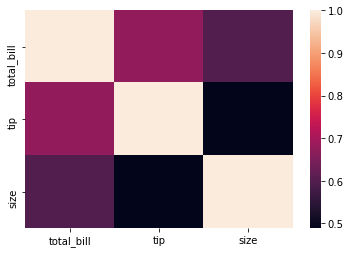

In [6]:
sns.heatmap(df4.corr())

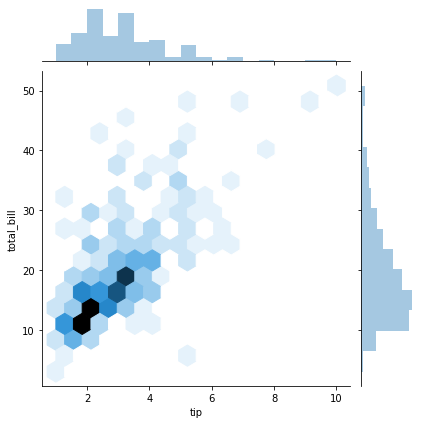

In [7]:
sns.jointplot(x='tip',y='total_bill',data=df4,kind='hex')

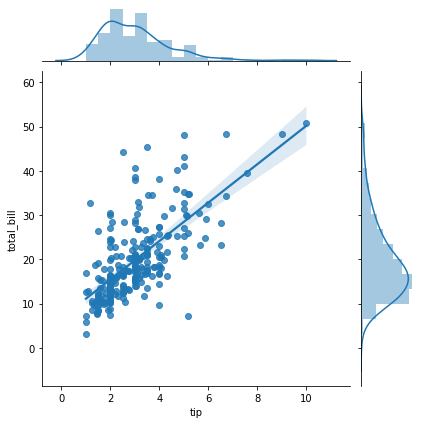

In [8]:
sns.jointplot(x='tip',y='total_bill',data=df4,kind='reg')

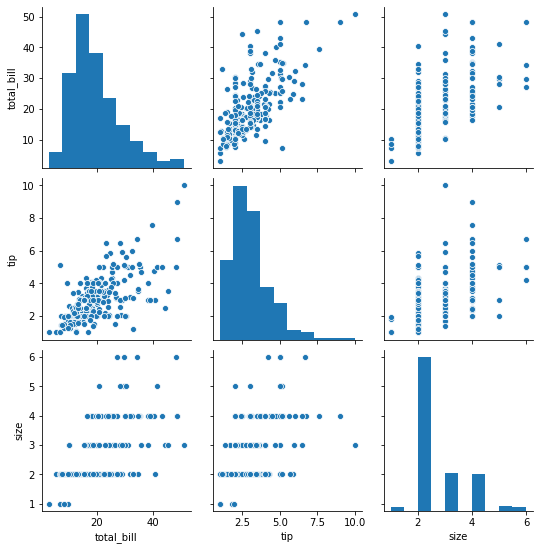

In [9]:
sns.pairplot(df4)

In [1]:
sns.pairplot(df4,hue='sex')

NameError: name 'sns' is not defined

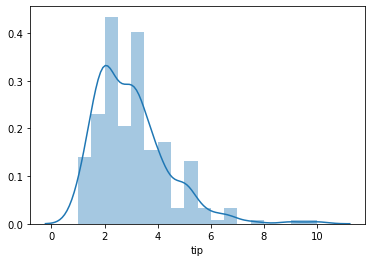

In [11]:
sns.distplot(df4['tip'])

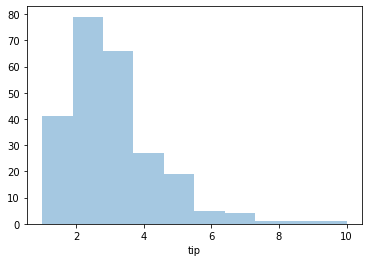

In [12]:
sns.distplot(df4['tip'], kde=False,bins=10)

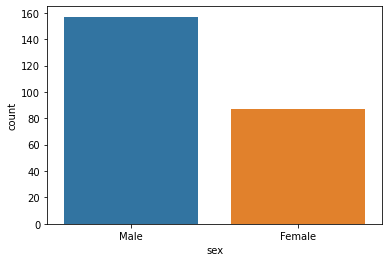

In [13]:
sns.countplot('sex',data=df4)

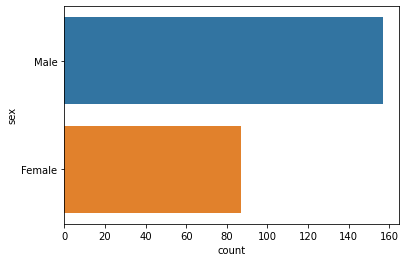

In [14]:
sns.countplot(y='sex',data=df4)

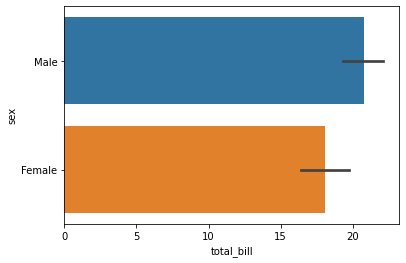

In [15]:
sns.barplot(x='total_bill',y='sex',data=df4)

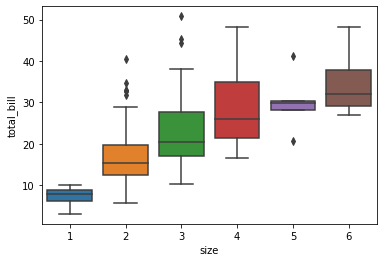

In [16]:
sns.boxplot('size','total_bill',data=df4)

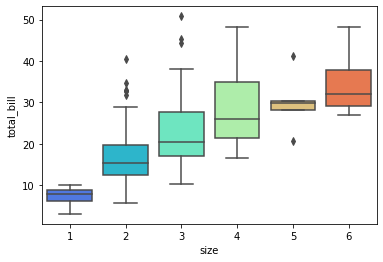

In [17]:
sns.boxplot(x='size',y='total_bill',data=df4,palette='rainbow')

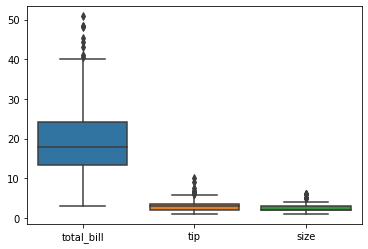

In [18]:
sns.boxplot(data=df4, orient='v')

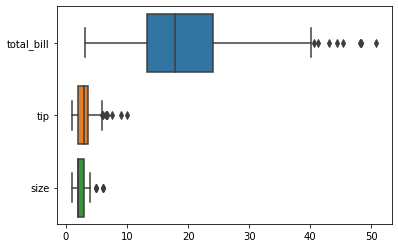

In [19]:
sns.boxplot(data=df4, orient='h')

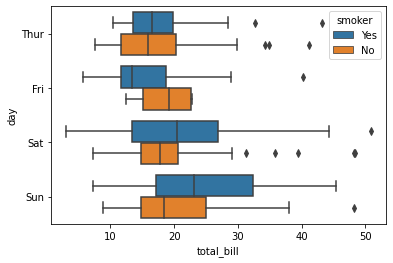

In [20]:
sns.boxplot(x='total_bill',y='day',data=df4, hue='smoker')

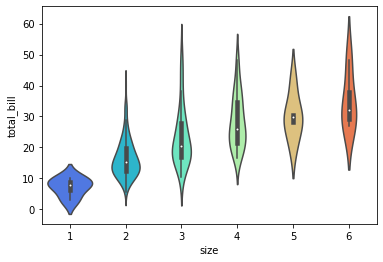

In [21]:
sns.violinplot(x='size',y='total_bill',data=df4,palette='rainbow')

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
train = pd.read_csv("titanic//train.csv")

In [29]:
test = pd.read_csv("titanic//test.csv")

In [30]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


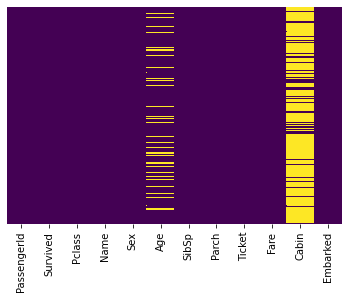

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

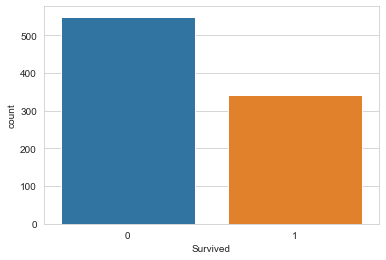

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

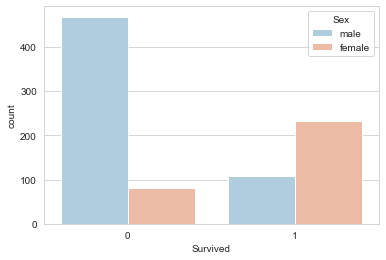

In [36]:
sns.countplot(x='Survived',data=train, hue='Sex',palette='RdBu_r')

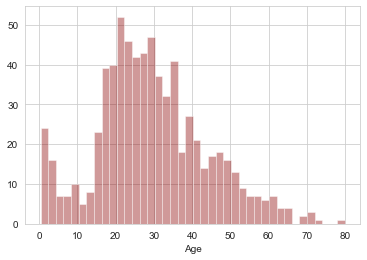

In [39]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

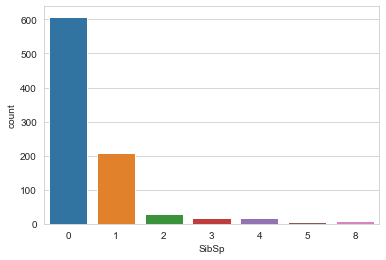

In [40]:
sns.countplot(x='SibSp',data=train)

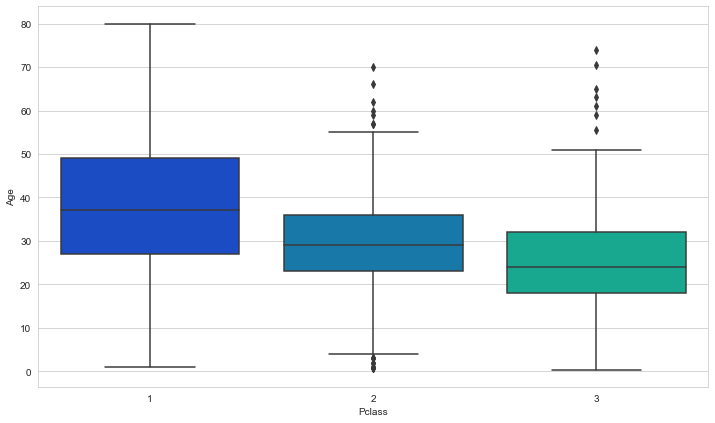

In [42]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [53]:
def add(num1,num2):
    return num1+num2

In [54]:
add(4,5)

9

In [45]:
ass = lambda a,b:a+b

In [48]:
add(12,5)

<function __main__.add.<locals>.<lambda>(a, b)>

In [55]:
def even(num):
    if num%2==0:
        return True

In [57]:
lst=[1,2,3,4,5,6,7,8,9,10]

In [58]:
list(filter(even,lst))

[2, 4, 6, 8, 10]

In [59]:
list(filter(lambda n:n%2==0,lst))

[2, 4, 6, 8, 10]

In [60]:
list(map(lambda n:n%2==0,lst))

[False, True, False, True, False, True, False, True, False, True]

In [5]:
lst = []
def lst_square(lst):
    for i in lst:
        lst.append(i*i)
    return lst

In [7]:
lst = [1,2,3,4,5,6]
lst_square(lst)

KeyboardInterrupt: 

In [ ]:
[i*i for i in lst if i%2==0]